In [1]:
import numpy as np 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Préparation du Dataset

In [2]:
dataset= pd.read_csv("/kaggle/input/cancer/colon_cancer.csv", sep=";")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_sample      804 non-null    object 
 1   ADH1C          804 non-null    float64
 2   DHRS11         804 non-null    float64
 3   UGP2           804 non-null    float64
 4   SLC7A5         804 non-null    float64
 5   CTSS           804 non-null    float64
 6   DAO            804 non-null    float64
 7   NIBAN1         804 non-null    float64
 8   PRUNE2         804 non-null    float64
 9   FOXF2          804 non-null    float64
 10  TENT5C         804 non-null    float64
 11  KLF10          804 non-null    float64
 12  FABP1          804 non-null    float64
 13  RPSAP19        804 non-null    float64
 14  NCAPH          804 non-null    float64
 15  TPM1           804 non-null    float64
 16  PLA2G12B       804 non-null    float64
 17  PLAAT4         804 non-null    float64
 18  IGLV8-61  

In [4]:
dataset.head(10)

,id_sample,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
0,EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,...,5.528372,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
1,EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
2,EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
3,EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
4,EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal
5,EPSM-COLON-0006,6.406039,2.335033,7.081085,3.227816,5.388937,8.004194,4.513158,2.442775,4.136829,...,4.173479,6.498450,3.914404,4.889543,1.608211,2.609667,4.932469,3.966183,2.341485,normal
6,EPSM-COLON-0007,3.985454,5.033729,7.571114,3.979432,5.926514,7.952320,3.910552,4.580215,4.191695,...,3.674043,2.394592,4.670876,4.478123,1.205706,2.609667,7.100798,1.245197,4.136955,normal
7,EPSM-COLON-0008,9.734343,5.885948,7.162757,4.295902,8.184338,9.093538,3.066902,3.260031,4.027095,...,4.980261,6.144669,6.450809,5.849524,2.332718,2.865922,7.100798,0.461184,4.612226,normal
8,EPSM-COLON-0009,8.909593,5.762813,6.770877,2.870815,7.416851,8.441184,2.913308,2.545726,3.592950,...,4.537327,5.830196,4.239554,5.087848,1.834207,1.769159,6.801051,2.942410,2.514274,normal
9,EPSM-COLON-0010,7.767618,5.459838,6.836071,3.069581,6.141545,8.107941,3.970812,4.831679,4.850095,...,4.865007,6.003157,5.516344,4.295270,1.567960,4.531581,5.942375,2.536512,2.235869,normal


In [5]:
#Vérification de valeurs manquantes
dataset.isnull().sum()

id_sample        0
ADH1C            0
DHRS11           0
UGP2             0
SLC7A5           0
                ..
GAL              0
CRYL1            0
YBX2             0
ANGPTL4          0
tissue_status    0
Length: 62, dtype: int64

In [6]:
#Vérification de données dupliquées
sum(dataset.duplicated(subset = 'id_sample')) == 0

True

In [7]:
dataset["tissue_status"].describe()

count        804
unique         2
top       normal
freq         402
Name: tissue_status, dtype: object

In [8]:
new_data=dataset.copy()

In [9]:
new_data['status'] = le().fit_transform(dataset['tissue_status'])

In [10]:
new_data.head(5)

,id_sample,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,...,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status,status
0,EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,...,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal,0
1,EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,...,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal,0
2,EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,...,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal,0
3,EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,...,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal,0
4,EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,...,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal,0


In [11]:
#"0":Normal
#"1":tumoral


In [12]:
from sklearn.model_selection import train_test_split
Y=new_data["status"]
X=new_data.drop(["id_sample","tissue_status","status"], axis=1)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Analyse de la distribution des  des classes

<Axes: >

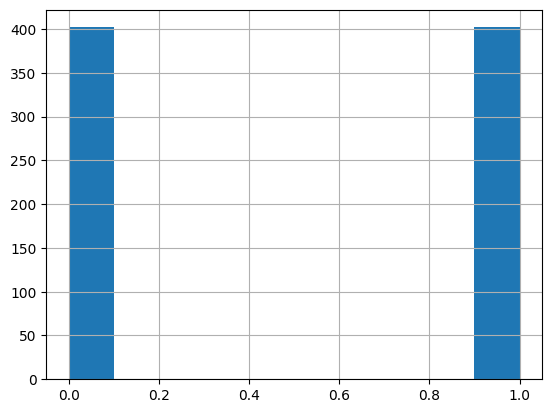

In [14]:
Y.hist()

/tmp/ipykernel_36/2078859179.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,3))  # Ajuster la taille de la figure


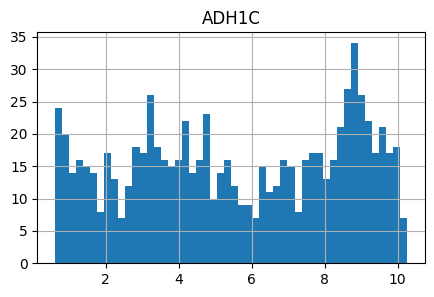

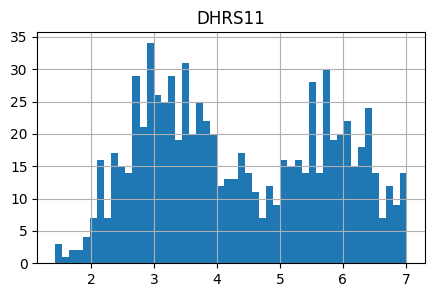

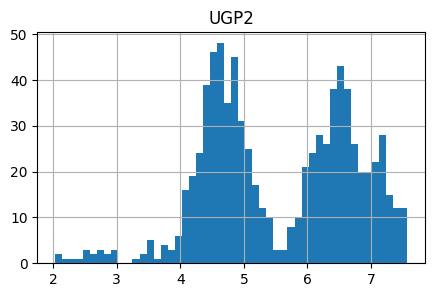

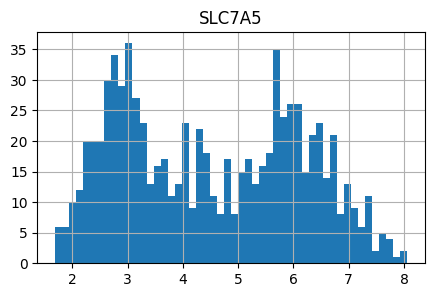

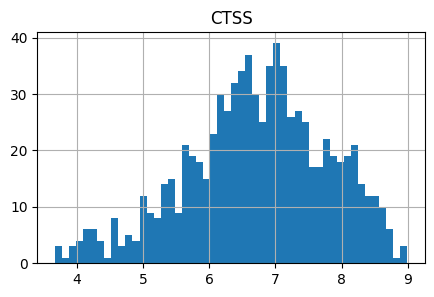

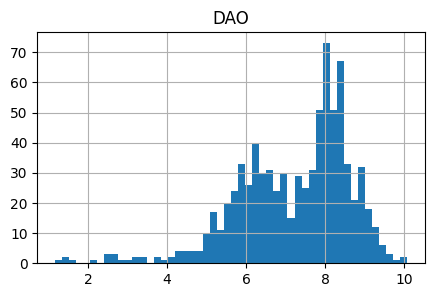

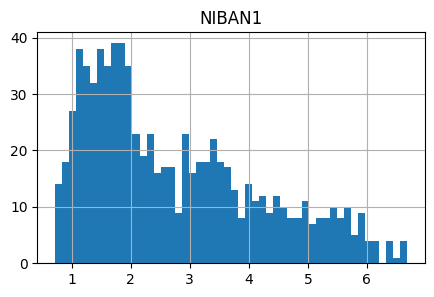

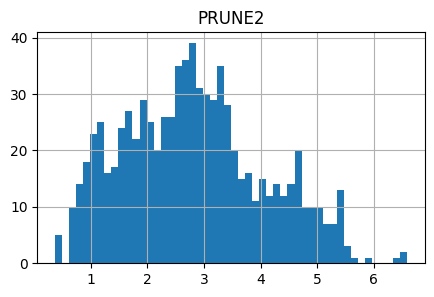

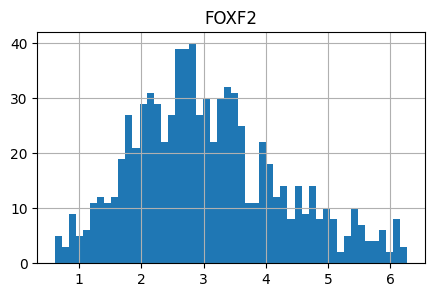

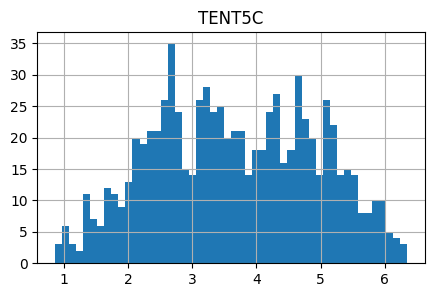

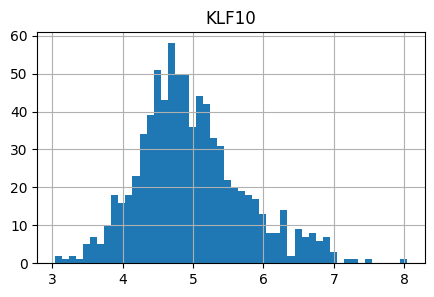

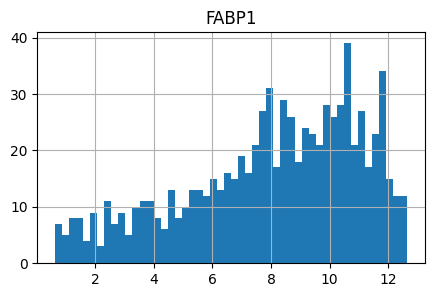

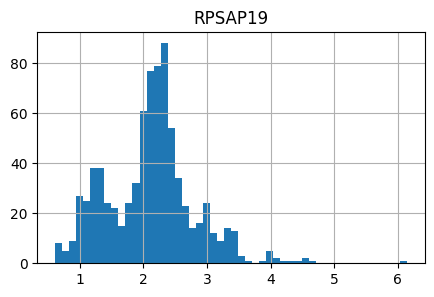

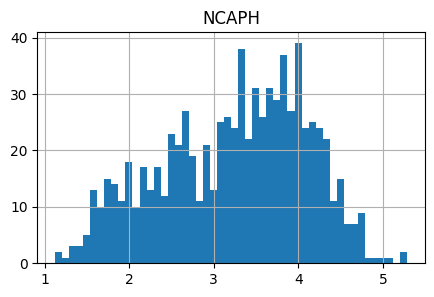

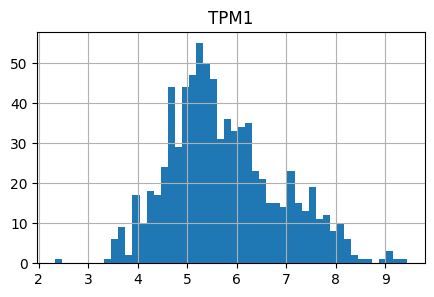

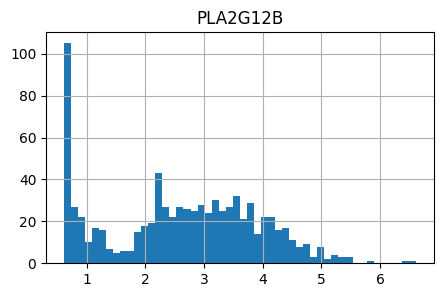

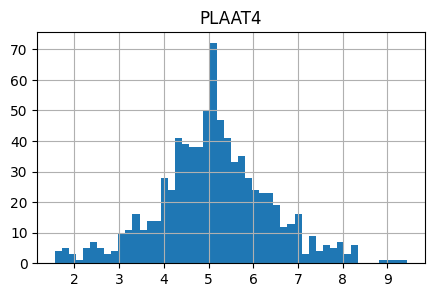

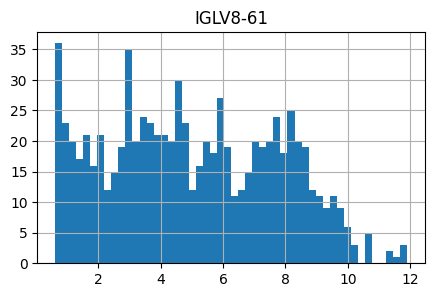

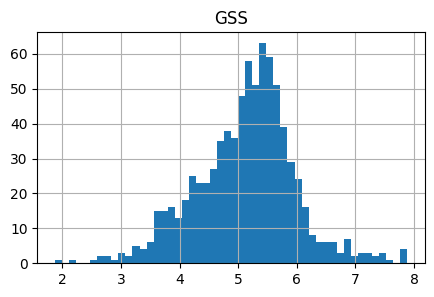

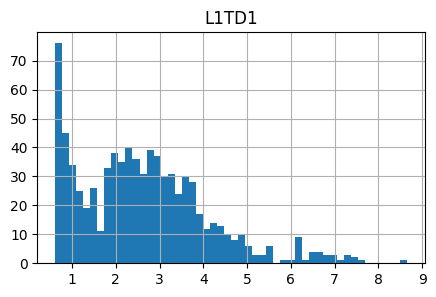

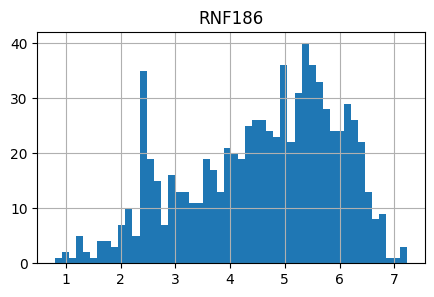

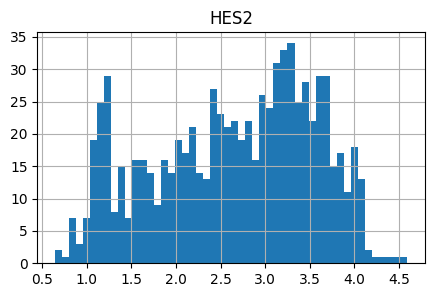

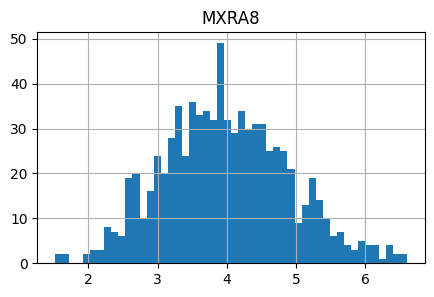

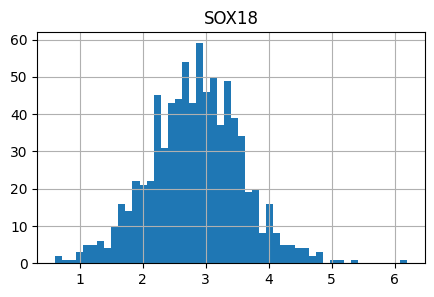

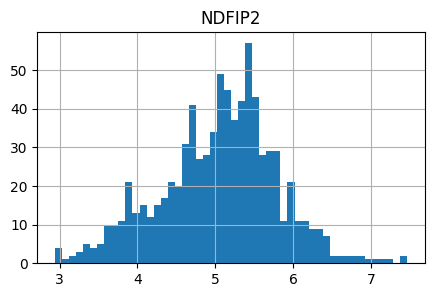

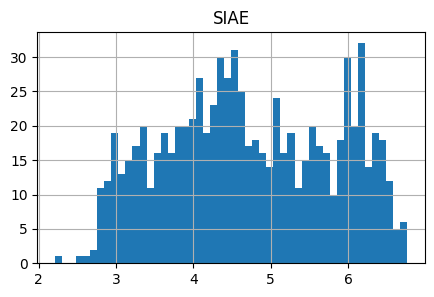

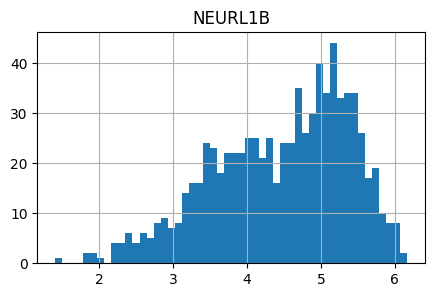

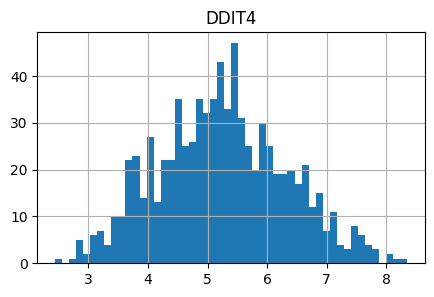

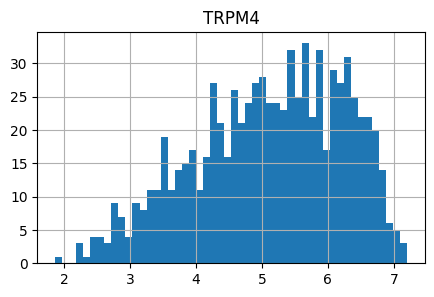

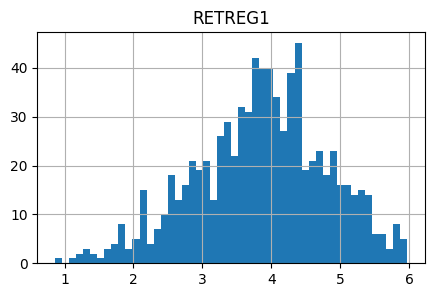

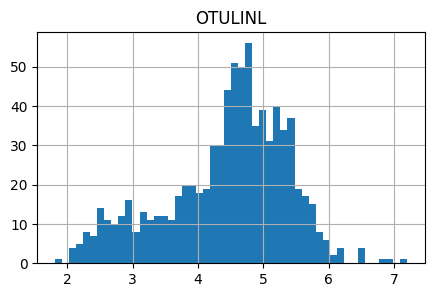

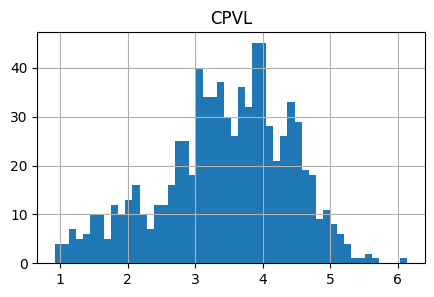

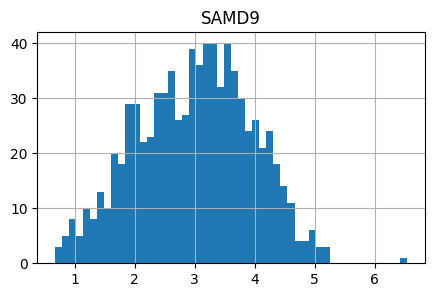

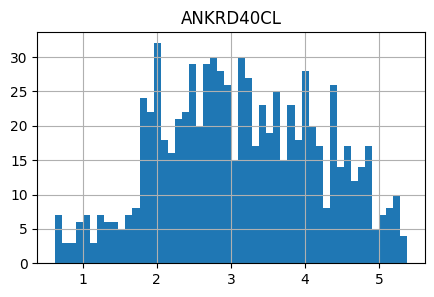

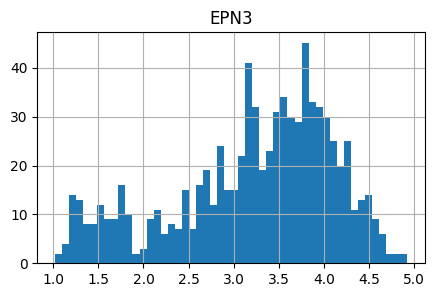

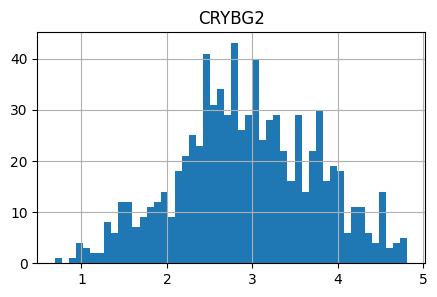

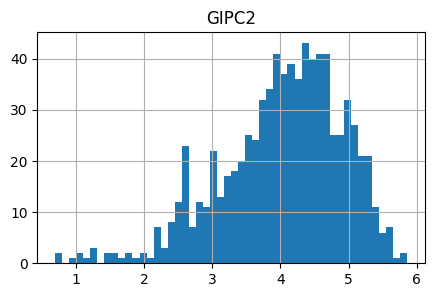

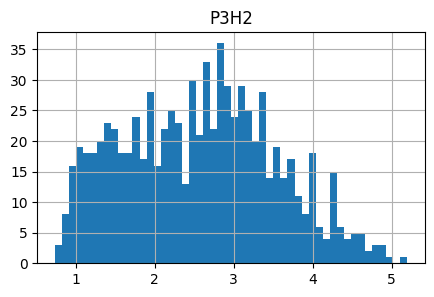

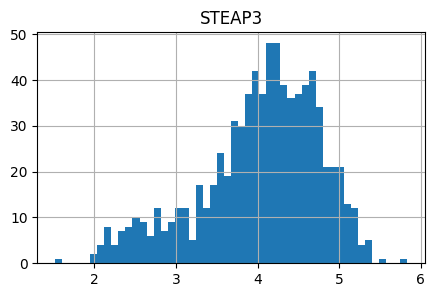

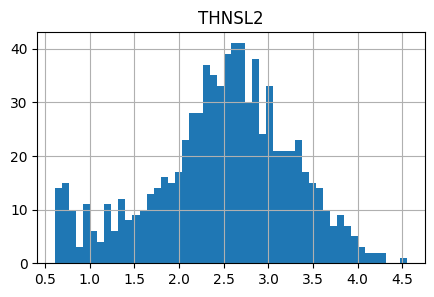

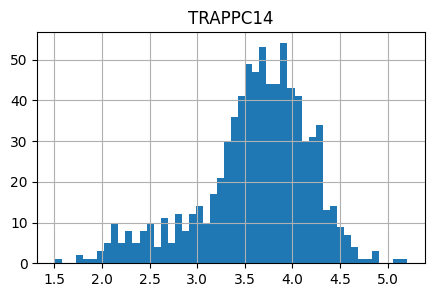

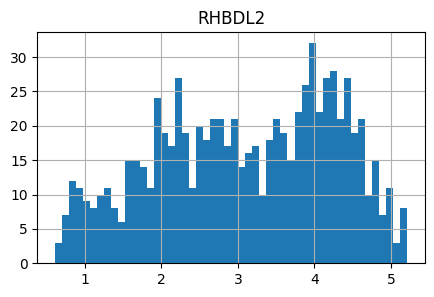

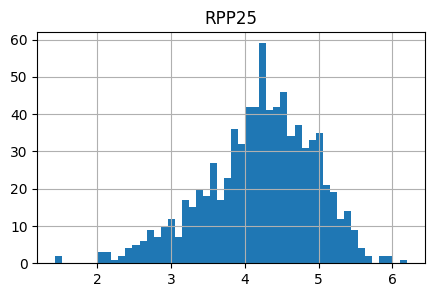

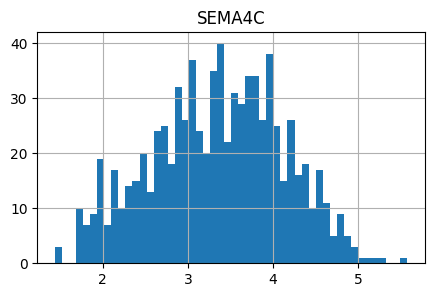

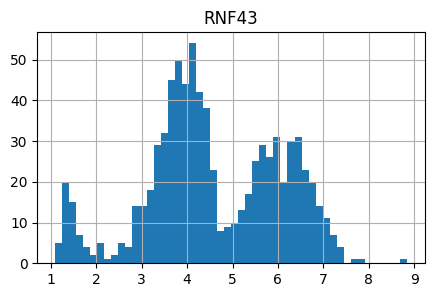

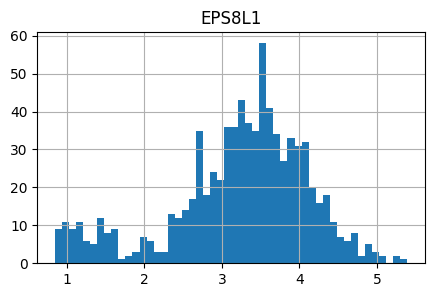

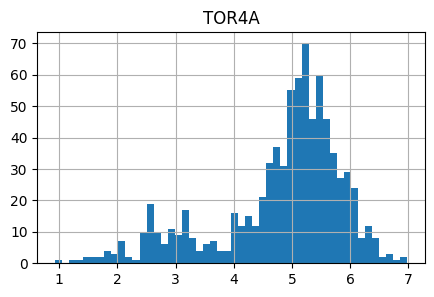

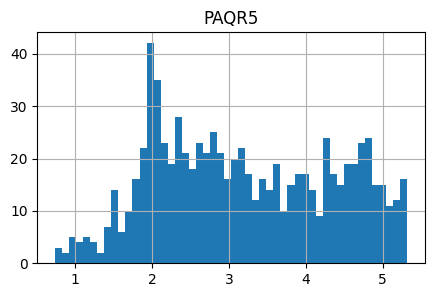

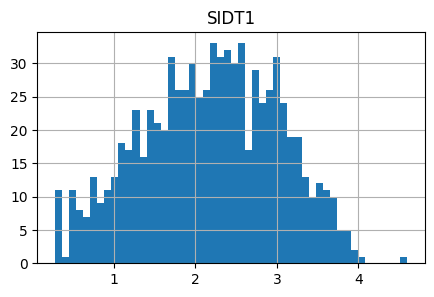

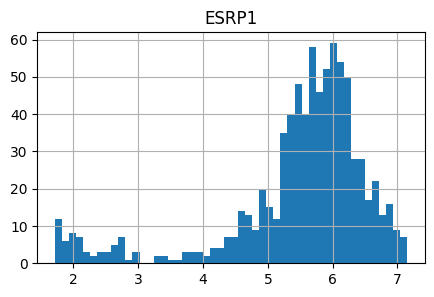

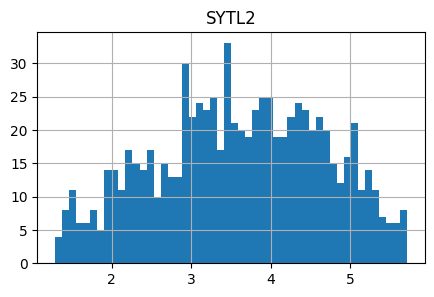

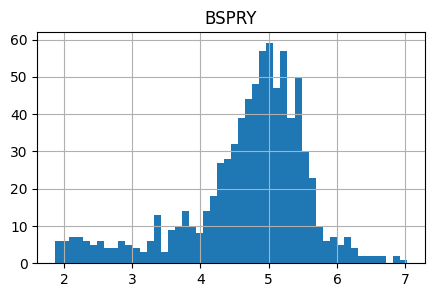

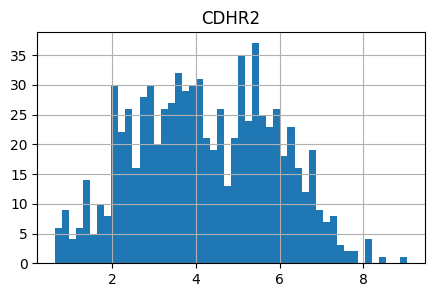

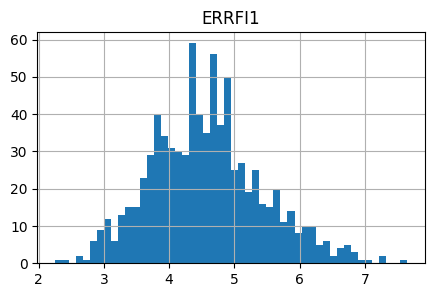

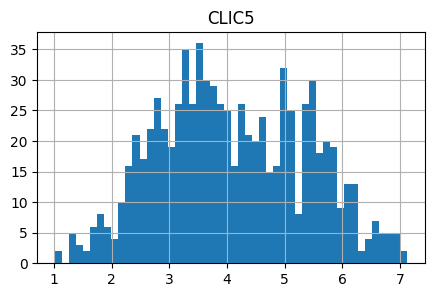

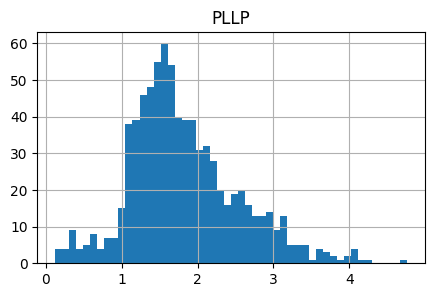

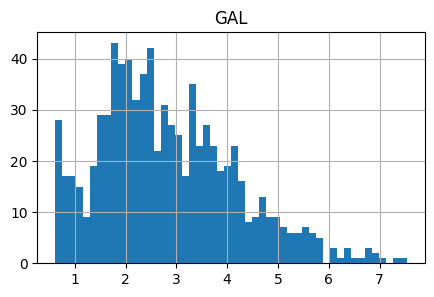

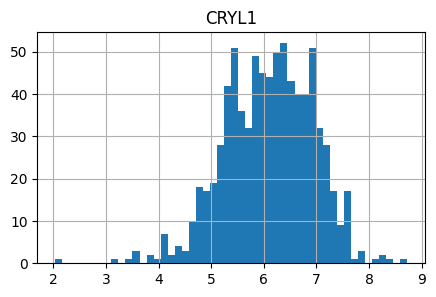

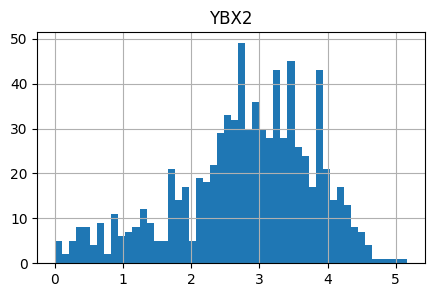

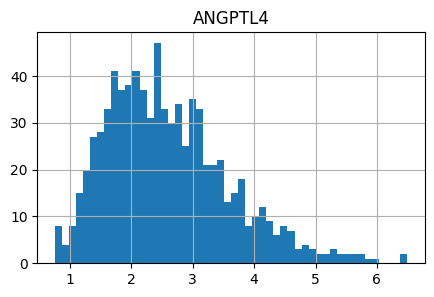

In [15]:
# Tracer l'histogramme de chaque variable
for column in X.columns:
    plt.figure(figsize=(5,3))  # Ajuster la taille de la figure
    X[column].hist(bins=50)
    plt.title(column)
plt.show()


In [16]:
# Statistique descriptive des variables
for column in X.columns:
    print(X[column].describe())

count    804.000000
mean       5.588943
std        2.889901
min        0.610504
25%        3.174250
50%        5.467024
75%        8.444756
max       10.263846
Name: ADH1C, dtype: float64
count    804.000000
mean       4.354817
std        1.431179
min        1.427079
25%        3.118844
50%        4.125990
75%        5.696566
max        7.022241
Name: DHRS11, dtype: float64
count    804.000000
mean       5.557694
std        1.150565
min        2.027201
25%        4.611060
50%        5.412204
75%        6.556969
max        7.571114
Name: UGP2, dtype: float64
count    804.000000
mean       4.513570
std        1.614450
min        1.685024
25%        3.030022
50%        4.382953
75%        5.918848
max        8.059430
Name: SLC7A5, dtype: float64
count    804.000000
mean       6.717535
std        1.077821
min        3.668691
25%        6.065937
50%        6.762908
75%        7.485487
max        8.990703
Name: CTSS, dtype: float64
count    804.000000
mean       7.218184
std        1.411969


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

# Régression Logistique 

In [19]:
lRegr = LogisticRegression()
lRegr.fit(X_train_scaled, Y_train)

LogisticRegression()

In [20]:

prediction = lRegr.predict(X_test_scaled)

# Évaluation de la performance du modèle Logistic Regression
accuracy2 = accuracy_score(Y_test, prediction)
print("accuracy du modèle scaled :", accuracy2)

# Calcul de la matrice de confusion pour le modèle Logistic Regression
matrice_confusion = confusion_matrix(Y_test, prediction)
#sns.heatmap(matrice_confusion,cmap="Blues",xticklabels = [])
print("Matrice de confusion :")
print(matrice_confusion)

accuracy du modèle scaled : 1.0
Matrice de confusion :
[[80  0]
 [ 0 81]]


In [21]:
data=new_data.drop(["id_sample","tissue_status"], axis=1)

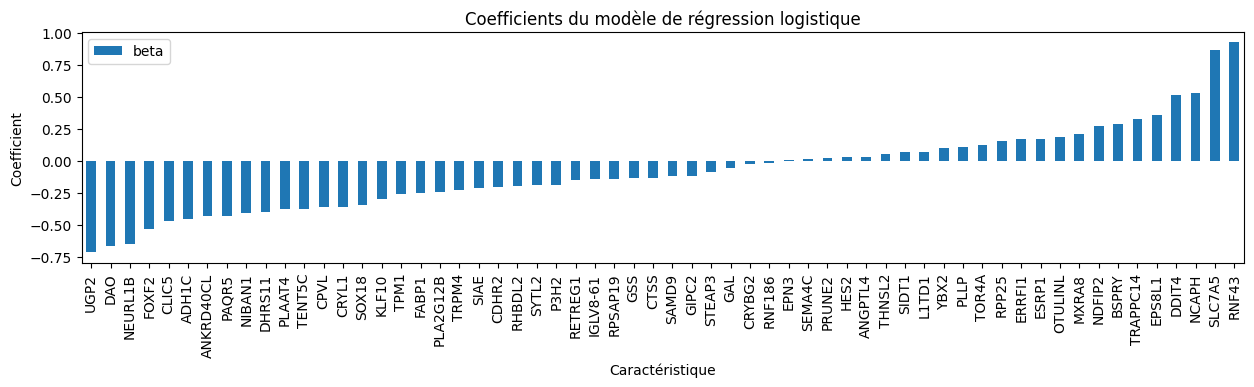

In [22]:
#Coef de mon modèle
# Créer un DataFrame pour stocker les coefficients
coefficients = pd.DataFrame(lRegr.coef_[0], index=X.columns, columns=['beta'])

# Trier les coefficients par ordre croissant
coefficients = coefficients.sort_values(by='beta')

# Afficher les coefficients sous forme de graphique à barres
coefficients.plot.bar(figsize=(15, 3))
plt.xlabel('Caractéristique')
plt.ylabel('Coefficient')
plt.title('Coefficients du modèle de régression logistique')
plt.show()

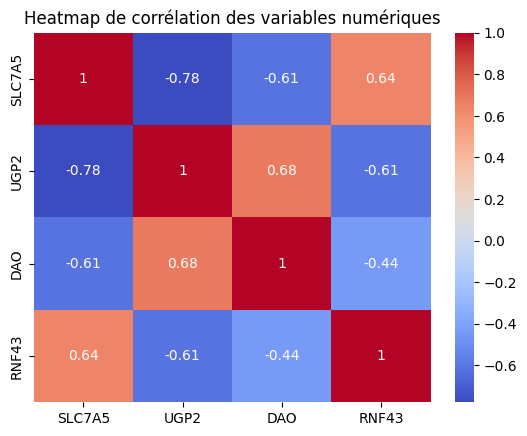

In [23]:
# Génération de la heatmap de corrélation
var=["SLC7A5","UGP2","DAO", "RNF43"]
new=data[var]
sns.heatmap(new.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

**Tuning du modèle avec les top features**

In [24]:
# Définir les ensembles de caractéristiques
feature_sets = [
    ["SLC7A5"],
    ["SLC7A5", "RNF43"],
    ["SLC7A5", "RNF43", "DAO"]
]

# Itérer sur chaque ensemble de caractéristiques
for idx, features in enumerate(feature_sets, 1):
    # Sélectionner les caractéristiques actuelles
    x = data[features]
    
    # Diviser les données en ensembles d'entraînement et de test
    x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)
    
    # Appliquer le scaling
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Initialiser et entraîner le modèle de régression logistique
    lr = LogisticRegression()
    lr.fit(x_train_scaled, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    predictions = lr.predict(x_test_scaled)
    
    # Évaluer la performance du modèle
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    
    # Afficher les résultats
    print(f"\nRésultats pour Xtop{idx} ({', '.join(features)}):")
    print(f"Accuracy du modèle : {accuracy:.4f}")
    print("Matrice de confusion :")
    print(conf_matrix)
    print("-" * 40)



Résultats pour Xtop1 (SLC7A5):
Accuracy du modèle : 0.9255
Matrice de confusion :
[[74  6]
 [ 6 75]]
----------------------------------------

Résultats pour Xtop2 (SLC7A5, RNF43):
Accuracy du modèle : 0.9565
Matrice de confusion :
[[79  1]
 [ 6 75]]
----------------------------------------

Résultats pour Xtop3 (SLC7A5, RNF43, DAO):
Accuracy du modèle : 0.9938
Matrice de confusion :
[[79  1]
 [ 0 81]]
----------------------------------------


**Etude de cas**

In [25]:
new_patient= { 'SLC7A5': [4.10],'RNF43': [4.68], 'DAO': [7.59]}
new=pd.DataFrame(new_patient)
new.head()

,SLC7A5,RNF43,DAO
0,4.1,4.68,7.59


In [26]:
new_patient_scaled=scaler.transform(new)

In [27]:
predictions = lr.predict(new_patient_scaled)
print(predictions)

[0]


In [28]:
#La probabilité prédite pour ce patient d'avoir un cancer du colon
lr.predict_proba(new_patient_scaled)

array([[0.67515934, 0.32484066]])

# Prédictions avec SVM

In [29]:
svm_model = SVC(random_state=42,probability=True)
# Entraînement du modèle sur les données d'entraînement
svm_model.fit(X_train_scaled, Y_train)

SVC(probability=True, random_state=42)

In [30]:
# Prédiction sur l'ensemble de test_scaled  avec SVM
y_pred1 = svm_model.predict(X_test_scaled)
# Évaluation de la performance du modèle SVM
accuracy4 = accuracy_score(Y_test, y_pred1)
print("accuracy du modèle :", accuracy4)
# Calcul de la matrice de confusion pour le modèle SVM
matrice_confusion = confusion_matrix(Y_test, y_pred1)
print("Matrice de confusion :")
print(matrice_confusion)

accuracy du modèle : 1.0
Matrice de confusion :
[[80  0]
 [ 0 81]]


**Tuning du model SVM evec les top1,2,3 features**

In [31]:
# Définir les ensembles de caractéristiques
feature_sets = [
    ["SLC7A5"],
    ["SLC7A5", "RNF43"],
    ["SLC7A5", "RNF43", "DAO"]
]

# Itérer sur chaque ensemble de caractéristiques
for idx, features in enumerate(feature_sets, 1):
    # Sélectionner les caractéristiques actuelles
    x = data[features]
    
    # Diviser les données en ensembles d'entraînement et de test
    x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)
    
    # Appliquer le scaling
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Initialiser et entraîner le modèle de régression logistique
    svm_model = SVC(random_state=42,probability=True)
    svm_model.fit(x_train_scaled, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    predictions = svm_model.predict(x_test_scaled)
    
    # Évaluer la performance du modèle
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    
    # Afficher les résultats
    print(f"\nRésultats pour Xtop{idx} ({', '.join(features)}):")
    print(f"Accuracy du modèle : {accuracy:.4f}")
    print("Matrice de confusion :")
    print(conf_matrix)
    print("-" * 40)



Résultats pour Xtop1 (SLC7A5):
Accuracy du modèle : 0.9130
Matrice de confusion :
[[76  4]
 [10 71]]
----------------------------------------

Résultats pour Xtop2 (SLC7A5, RNF43):
Accuracy du modèle : 0.9441
Matrice de confusion :
[[78  2]
 [ 7 74]]
----------------------------------------

Résultats pour Xtop3 (SLC7A5, RNF43, DAO):
Accuracy du modèle : 0.9938
Matrice de confusion :
[[79  1]
 [ 0 81]]
----------------------------------------


In [32]:
predictions = svm_model.predict(new_patient_scaled)
print(predictions)


[0]


In [33]:
#La probabilité prédite pour ce patient d'avoir un cancer du colon
svm_model.predict_proba(new_patient_scaled)

array([[0.73984611, 0.26015389]])

# Prédictions avec K-NN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
# Initialiser le modèle K-NN
knn_model = KNeighborsClassifier()
# Entraînement du modèle sur les données d'entraînement
knn_model.fit(X_train_scaled, Y_train)

In [36]:
# Prédiction sur l'ensemble de test_scaled  avec SVM
predict = knn_model.predict(X_test_scaled)
# Évaluation de la performance du modèle SVM
Accuracy = accuracy_score(Y_test, predict)
print("accuracy du modèle :", Accuracy)
# Calcul de la matrice de confusion pour le modèle SVM
matrice_confusion = confusion_matrix(Y_test, predict)
print("Matrice de confusion :")
print(matrice_confusion)

accuracy du modèle : 1.0
Matrice de confusion :
[[80  0]
 [ 0 81]]


In [37]:
from sklearn.model_selection import GridSearchCV
# Définir une grille d'hyperparamètres à tester
param_grid = {
    'n_neighbors': [1,2,3,4,10, 20],  # nombre de voisins à tester
}
# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

# Afficher les meilleurs hyperparamètres
print("Best hyperparameters for K-NN:", grid_search.best_params_)

Best hyperparameters for K-NN: {'n_neighbors': 3}


In [38]:
knn_model1 = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1)

In [39]:
# Entraînement du modèle sur les données d'entraînement
knn_model1.fit(X_train_scaled, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [40]:
# Prédiction sur l'ensemble de test_scaled  avec SVM
predict = knn_model1.predict(X_test_scaled)
# Évaluation de la performance du modèle SVM
Accuracy = accuracy_score(Y_test, predict)
print("accuracy du modèle :", Accuracy)
# Calcul de la matrice de confusion pour le modèle SVM
matrice_confusion = confusion_matrix(Y_test, predict)
print("Matrice de confusion :")
print(matrice_confusion)

accuracy du modèle : 1.0
Matrice de confusion :
[[80  0]
 [ 0 81]]


# Prédiction avec décision tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
# Entraînement du modèle sur les données d'entraînement
dt_model.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [57]:
# Prédiction sur l'ensemble de test_scaled  avec Decision tree
predict = dt_model.predict(X_test_scaled)
# Évaluation de la performance du modèle Decision tree
Accuracy = accuracy_score(Y_test, predict)
print("accuracy du modèle :", Accuracy)
# Calcul de la matrice de confusion pour le modèle Decision tree
matrice_confusion = confusion_matrix(Y_test, predict)
print("Matrice de confusion :")
print(matrice_confusion)

accuracy du modèle : 1.0
Matrice de confusion :
[[80  0]
 [ 0 81]]


In [44]:
# Définir une grille d'hyperparamètres à tester
param_grid = {
    'max_depth': [3, 5, 10, None],  # profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # nombre minimum d'échantillons pour splitter un noeud
    'criterion': ['gini', 'entropy']  # critère de décision
}
# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

# Afficher les meilleurs hyperparamètres
print("Best hyperparameters for Decision Tree:", grid_search.best_params_)

Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [45]:
dt_model1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, min_samples_split= 2)

In [46]:
# Entraînement du modèle sur les données d'entraînement
dt_model1.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [47]:
# Prédiction sur l'ensemble de test_scaled  avec Decision tree
predict = dt_model1.predict(X_test_scaled)
# Évaluation de la performance du modèle Decision tree
Accuracy = accuracy_score(Y_test, predict)
print("accuracy du modèle :", Accuracy)
# Calcul de la matrice de confusion pour le modèle Decision tree
matrice_confusion = confusion_matrix(Y_test, predict)
print("Matrice de confusion :")
print(matrice_confusion)

accuracy du modèle : 1.0
Matrice de confusion :
[[80  0]
 [ 0 81]]


# Prédiction avec Random Forrest

In [58]:
from sklearn.ensemble import RandomForestClassifier
# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier()
# Entraînement du modèle sur les données d'entraînement
rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier()

In [50]:
# Prédiction sur l'ensemble de test_scaled  avec Decision tree
predict = rf_model.predict(X_test_scaled)
# Évaluation de la performance du modèle Decision tree
Accuracy = accuracy_score(Y_test, predict)
print("accuracy du modèle :", Accuracy)
# Calcul de la matrice de confusion pour le modèle Decision tree
matrice_confusion = confusion_matrix(Y_test, predict)
print("Matrice de confusion :")
print(matrice_confusion)

accuracy du modèle : 1.0
Matrice de confusion :
[[80  0]
 [ 0 81]]


In [51]:
# Définir une grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [5, 25, 50, 100],  # nombre d'arbres
    'max_depth': [None,5, 10, 20],  # profondeur maximale de l'arbre
    'min_samples_split': [2, 5],  # nombre minimum d'échantillons pour splitter un noeud
    'criterion': ['gini', 'entropy']  # critère de décision
}

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

# Afficher les meilleurs hyperparamètres
print("Best hyperparameters for Random Forest:", grid_search.best_params_)

Best hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 25}


    Feature  Decision Tree Importance  Random Forest Importance
26  NEURL1B                  0.006201                  0.164280
2      UGP2                  0.903260                  0.160478
44    RNF43                  0.024411                  0.099035
5       DAO                  0.000000                  0.075357
1    DHRS11                  0.047640                  0.072157
3    SLC7A5                  0.000000                  0.067918
0     ADH1C                  0.000000                  0.059309
8     FOXF2                  0.000000                  0.040646
54    CLIC5                  0.000000                  0.031543
47    PAQR5                  0.000000                  0.025579


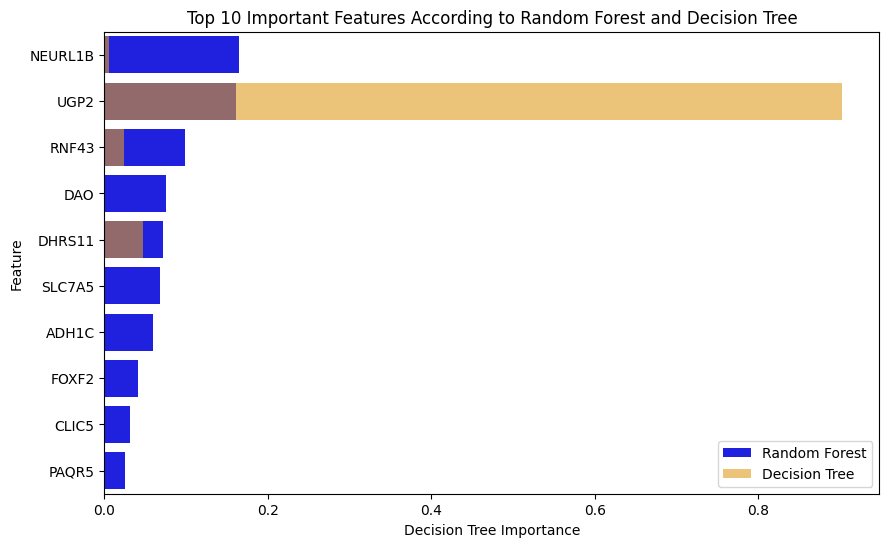

In [55]:
# Récupérer les importances des features
feature_importances_dt = dt_model.feature_importances_
feature_importances_rf = rf_model.feature_importances_

# Création d'un dataframe pour afficher les importances de façon ordonnée
features = X.columns
importances_df = pd.DataFrame({
    'Feature': features,
    'Decision Tree Importance': feature_importances_dt,
    'Random Forest Importance': feature_importances_rf
})

# Tri des features par importance
importances_df = importances_df.sort_values(by='Random Forest Importance', ascending=False)

# Affichage des 10 features les plus importantes
print(importances_df.head(10))

# Visualisation des importances des features (avec un focus sur les 10 premiers)
plt.figure(figsize=(10, 6))
sns.barplot(x="Random Forest Importance", y="Feature", data=importances_df.head(10), color="blue", label="Random Forest")
sns.barplot(x="Decision Tree Importance", y="Feature", data=importances_df.head(10), color="orange", label="Decision Tree", alpha=0.6)

plt.title('Top 10 Important Features According to Random Forest and Decision Tree')
plt.legend()
plt.show()